In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json

### BUS STOPS

In [3]:
bus_stops_req = requests.get('https://services3.arcgis.com/rl7ACuZkiFsmDA2g/arcgis/rest/services/Transit_Stops_and_Routes/FeatureServer/0/query?where=1%3D1&outFields=stop_code,stop_name,stop_lat,stop_lon,stop_id,OBJECTID&returnGeometry=false&outSR=4326&f=json')
bus_stops = json.loads(bus_stops_req.text)

In [4]:
bus_stops['features'][0]

{'attributes': {'stop_code': '1001',
  'stop_name': 'Kennedy Rd S n/of First Gulf Blvd',
  'stop_lat': '43.673256',
  'stop_lon': '-79.718468',
  'stop_id': '00000020',
  'OBJECTID': 1}}

In [5]:
df_stops = json_normalize(bus_stops, ['features'])
# df_stops = df_stops.drop(['type','properties.stop_desc', 'properties.zone_id','properties.stop_url', 
#                           'properties.location_type', 'properties.parent_station', 'properties.stop_timezone',
#                           'properties.wheelchair_boarding','geometry.type', 'geometry.coordinates'], axis=1)

# Convert lat and lon from object to numeric types
df_stops['attributes.stop_lat'] = pd.to_numeric(df_stops['attributes.stop_lat'])
df_stops['attributes.stop_lon'] = pd.to_numeric(df_stops['attributes.stop_lon'])

df_stops.head()

# SNIPPET BELOW IS NOT NEEDED ANYMORE, ONLY NEEDED FOR YORK REGION DATA
# Separate coordinates into X and Y columns
# coords = df_stops['geometry.coordinates'].apply(pd.Series)
# coords.columns = ['X', 'Y']
# df_stops = pd.concat([df_stops.iloc[:, :-1], coords[:]], axis=1)

,attributes.stop_code,attributes.stop_name,attributes.stop_lat,attributes.stop_lon,attributes.stop_id,attributes.OBJECTID
0,1001,Kennedy Rd S n/of First Gulf Blvd,43.673256,-79.718468,00000020,1
1,1002,Kennedy Rd S at Steeles Ave E,43.675159,-79.721710,00000030,2
2,1005,Rutherford Rd S n/of Steeles Ave E,43.681385,-79.718147,00000055,3
3,1006,Rutherford Rd S/of Bramsteele Rd,43.681969,-79.718979,00000060,4
4,1008,Rutherford Rd S n/of Bramsteele Rd,43.683807,-79.721458,00000070,5


### BUS ROUTES

In [6]:
bus_routes_req = requests.get('https://services3.arcgis.com/rl7ACuZkiFsmDA2g/arcgis/rest/services/Transit_Stops_and_Routes/FeatureServer/1/query?where=1%3D1&outFields=OBJECTID,shape_id,route_id,route_short_name,route_long_name,Shape__Length&outSR=4326&f=json')
bus_routes = json.loads(bus_routes_req.text)

In [7]:
bus_routes['features'][0]

{'attributes': {'OBJECTID': 1,
  'shape_id': '100022',
  'route_id': '10-273',
  'route_short_name': '10',
  'route_long_name': 'South Industrial',
  'Shape__Length': 11139.6410548243},
 'geometry': {'paths': [[[-79.718595121, 43.673217515],
    [-79.719074759, 43.67358755],
    [-79.7196101009999, 43.6739050840001],
    [-79.720123702, 43.6741368350001],
    [-79.720464178, 43.67428471],
    [-79.721268104, 43.6746898800001],
    [-79.721796217, 43.674998319],
    [-79.722634674, 43.6756478710001],
    [-79.721917471, 43.67629894],
    [-79.720071891, 43.6779746240001],
    [-79.718331225, 43.679554212],
    [-79.717236734, 43.6805566730001],
    [-79.7182580159999, 43.6813028500001],
    [-79.7190691979999, 43.6818953970001],
    [-79.719567647, 43.6822593380001],
    [-79.721551023, 43.6837410740001],
    [-79.722733282, 43.68462407],
    [-79.725164029, 43.6862557040001],
    [-79.725463748, 43.686457133],
    [-79.726483399, 43.6871726040001],
    [-79.728461276, 43.6885190990001]

In [8]:
df_routes = json_normalize(bus_routes, ['features'])
# df_routes = df_routes.drop(['type','properties.DESCRIPTION', 'properties.SCHEDULE_START', 'properties.SCHEDULE_END', 'geometry.type'], axis=1)

# # Separate coordinates into X and Y columns
# coords = df_routes['geometry.coordinates'].apply(pd.Series)
# coords.columns = ['X', 'Y']
# df_routes = pd.concat([df_routes.iloc[:, :-1], coords[:]], axis=1)

df_routes.head()

,attributes.OBJECTID,attributes.shape_id,attributes.route_id,attributes.route_short_name,attributes.route_long_name,attributes.Shape__Length,geometry.paths
0,1,100022,10-273,10,South Industrial,11139.641055,"[[[-79.718595121, 43.673217515], [-79.71907475..."
1,2,100023,10-273,10,South Industrial,12014.585063,"[[[-79.7156231791047, 43.6793698452164], [-79...."
2,3,10157,1-273,1,Queen,15005.585198,"[[[-79.7207905069999, 43.7187270320001], [-79...."
3,4,10181,1-273,1,Queen,24558.302194,"[[[-79.7629692909999, 43.686684649], [-79.7625..."
4,5,10188,1-273,1,Queen,13732.863721,"[[[-79.6496195989999, 43.7669375460001], [-79...."


## Plotting

In [9]:
# p_temp = pd.DataFrame(df_routes['geometry.paths'])
# https://www.mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas/

KeyError: 'geometry.coordinates'

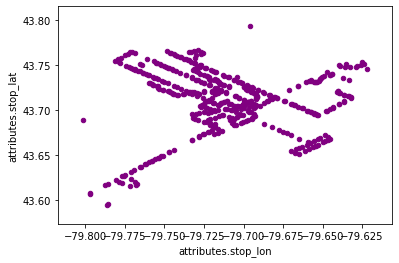

In [10]:
ax1 = df_stops[:500].plot(kind='scatter', x='attributes.stop_lon', y='attributes.stop_lat', color='purple')    
ax2 = df_routes[:500].plot(kind='scatter', x='geometry.coordinates', y='Y', color='g', ax=ax1)

mplleaflet.show(fig=ax1.figure)

### Testing

In [ ]:
# r = requests.get('https://services3.arcgis.com/rl7ACuZkiFsmDA2g/arcgis/rest/services/Transit_Stops_and_Routes/FeatureServer/1/query?where=1%3D1&outFields=OBJECTID,shape_id,route_id,route_short_name,route_long_name,Shape__Length&outSR=4326&f=json')

# inp = json.loads(r.text)

In [ ]:
# # [for feat in ]

# route_obj = [route_info['geometry']['paths'] for route_info in inp['features']]
# # ['features'][0]['geometry']['paths'][1]
# # df_routes = pd.DataFrame(route_obj)

# df_r = pd.DataFrame(route_obj[6][0], columns=['long', 'lat'])
# df_r_1 = pd.DataFrame(route_obj[6][1], columns=['long', 'lat'])

In [ ]:
# print(df_r.shape)
# print(df_r_1.shape)

In [ ]:
# ax_test = df_r.plot(kind='scatter', x='long', y='lat', color='blue')
# ax_test1 = df_r_1.plot(kind='scatter', x='long', y='lat', color='red', ax=ax_test)

# mplleaflet.show(fig=ax_test1.figure)
# # mplleaflet.show(fig=ax_test.figure)